<a href="https://colab.research.google.com/github/MasirikaConstantin/Constantin-/blob/main/Bim's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files

# Upload your Kaggle API key (kaggle.json)
uploaded = files.upload()  # Sélectionnez votre fichier kaggle.json

# Déplacez le fichier vers le bon répertoire
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Étape 1: Installation et configuration de l'API Kaggle
!pip install -q kaggle
from google.colab import files

# Téléversez votre fichier kaggle.json
uploaded = files.upload()

# Configurez les permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Étape 2: Téléchargement direct depuis Kaggle vers Colab
!kaggle datasets download -d kmader/mias-mammography

# Étape 3: Vérification et extraction
import zipfile
import os

# Vérifiez que le fichier a bien été téléchargé
if os.path.exists('mias-mammography.zip'):
    print("Fichier ZIP trouvé, extraction en cours...")
    with zipfile.ZipFile('mias-mammography.zip', 'r') as zip_ref:
        zip_ref.extractall('mias-mammography')
    print("Extraction terminée!")
else:
    print("Erreur: Le fichier ZIP n'a pas été téléchargé correctement")
    print("Contenu du répertoire:", os.listdir())

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kmader/mias-mammography
License(s): other
 79% 246M/312M [00:00<00:00, 673MB/s] 
100% 312M/312M [00:00<00:00, 675MB/s]
Fichier ZIP trouvé, extraction en cours...
Extraction terminée!


In [ ]:
import os

# Liste des fichiers extraits
dataset_path = '/content/mias-mammography'
print("Contenu du dataset extrait :")
print(os.listdir(dataset_path))

Contenu du dataset extrait :
['all-mias', 'all_mias_scans.h5', 'all-mias.tar.gz', 'Info.txt']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Chemin de destination dans Drive
drive_dataset_path = '/content/drive/MyDrive/MIAS_Mammography'

# Créez le dossier (si inexistant)
os.makedirs(drive_dataset_path, exist_ok=True)

# Copiez tout le contenu
shutil.copytree(dataset_path, drive_dataset_path, dirs_exist_ok=True)

print(f"Dataset sauvegardé dans : {drive_dataset_path}")

Dataset sauvegardé dans : /content/drive/MyDrive/MIAS_Mammography


In [ ]:


dataset_path = '/content/drive/MyDrive/MIAS_Mammography'

# Exemple : charger une image
from PIL import Image
image = Image.open(f"{dataset_path}/all-mias/mdb001.pgm")  # Adaptez le nom du fichier
image.show()


In [ ]:
# 1. Chargez les données
import pandas as pd
import h5py

# Exemple pour lire les annotations
annotations = pd.read_csv('/content/drive/MyDrive/MIAS_Mammography/Info.txt', delim_whitespace=True, header=None)
print(annotations)


annotations.columns = ['ref', 'tissue', 'abnormality', 'severity', 'x', 'y', 'radius']

# 2. Chargez les images (exemple avec le fichier H5)
with h5py.File('/content/drive/MyDrive/MIAS_Mammography/all_mias_scans.h5', 'r') as f:
    images = f['scans'][:]  # Adaptez selon la structure du fichier

# 3. Entraînez un modèle (exemple CNN simple)
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(1024, 1024, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(images, annotations['severity'].map({'B':0, 'M':1}), epochs=5)

          0   1      2         3    4    5       6
0    REFNUM  BG  CLASS  SEVERITY    X    Y  RADIUS
1    mdb001   G   CIRC         B  535  425     197
2    mdb002   G   CIRC         B  522  280      69
3    mdb003   D   NORM       NaN  NaN  NaN     NaN
4    mdb004   D   NORM       NaN  NaN  NaN     NaN
..      ...  ..    ...       ...  ...  ...     ...
326  mdb318   D   NORM       NaN  NaN  NaN     NaN
327  mdb319   D   NORM       NaN  NaN  NaN     NaN
328  mdb320   D   NORM       NaN  NaN  NaN     NaN
329  mdb321   D   NORM       NaN  NaN  NaN     NaN
330  mdb322   D   NORM       NaN  NaN  NaN     NaN

[331 rows x 7 columns]


/tmp/ipython-input-2868400421.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv('/content/drive/MyDrive/MIAS_Mammography/Info.txt', delim_whitespace=True, header=None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset trouvé : /content/drive/MyDrive/MIAS_Mammography
Nombre d'images disponibles : 325
Distribution des classes :
severity
B    69
M    54
Name: count, dtype: int64

Nombre total d'échantillons : 330
Classe positive (anormal) : 330
Classe négative (normal) : 0


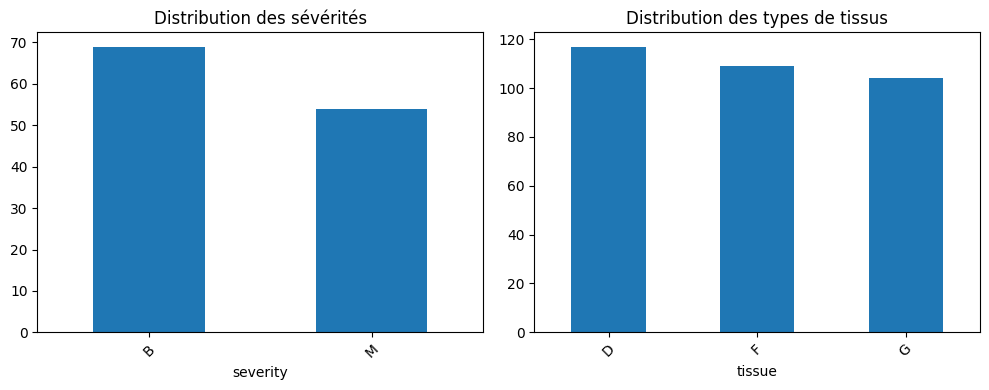

Vérification des images: 330it [00:00, 1090.80it/s]


Images valides trouvées : 330

=== FOLD 1/5 ===
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.4923 - auc: 0.0000e+00 - loss: 1.0041 - precision: 1.0000 - recall: 0.4923

16/16 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4937 - auc: 0.0000e+00 - loss: 1.0010 - precision: 1.0000 - recall: 0.4937 - val_accuracy: 0.8750 - val_auc: 0.0000e+00 - val_loss: 0.6288 - val_precision: 1.0000 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 831ms/step - accuracy: 0.5572 - auc: 0.0000e+00 - loss: 0.8566 - precision: 1.0000 - recall: 0.5572 - val_accuracy: 0.7344 - val_auc: 0.0000e+00 - val_loss: 0.6645 - val_precision: 1.0000 - val_recall: 0.7344 - learning_rate: 1.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 800ms/step - accuracy: 0.5106 - auc: 0.0000e+00 - loss: 0.8276 - precision: 1.0000 - recall: 0.5106 - val_accuracy: 0.8750 - val_auc: 0.0000e+00 - val_loss: 0.6498 - val_precision: 1.0000 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 822ms/step - accuracy: 0.5031 - auc: 0.0000e+00 - loss: 0.9001 - precision: 1.0000 - recall: 0.5031 - val_accuracy: 0.6406 - val_auc

16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5275 - auc: 0.0000e+00 - loss: 0.8974 - precision: 1.0000 - recall: 0.5275 - val_accuracy: 0.8594 - val_auc: 0.0000e+00 - val_loss: 0.6667 - val_precision: 1.0000 - val_recall: 0.8594 - learning_rate: 1.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 0.5321 - auc: 0.0000e+00 - loss: 0.8817 - precision: 1.0000 - recall: 0.5321 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.8243 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.4726 - auc: 0.0000e+00 - loss: 0.9139 - precision: 1.0000 - recall: 0.4726 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.8828 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 817ms/step - accuracy: 0.4997 - auc: 0.0000e+00 - loss: 0.8291 - precision: 1.0000 - recall: 0.4997 - val_ac

16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4952 - auc: 0.0000e+00 - loss: 0.8867 - precision: 1.0000 - recall: 0.4952 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.5347 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 809ms/step - accuracy: 0.5103 - auc: 0.0000e+00 - loss: 0.8718 - precision: 1.0000 - recall: 0.5103 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.5986 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - accuracy: 0.5691 - auc: 0.0000e+00 - loss: 0.8116 - precision: 1.0000 - recall: 0.5691 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.6093 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 781ms/step - accuracy: 0.5193 - auc: 0.0000e+00 - loss: 0.8615 - precision: 1.0000 - recall: 0.5193 - val_accuracy: 0.9844 - val_auc

16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5070 - auc: 0.0000e+00 - loss: 0.9255 - precision: 1.0000 - recall: 0.5070 - val_accuracy: 0.6406 - val_auc: 0.0000e+00 - val_loss: 0.6816 - val_precision: 1.0000 - val_recall: 0.6406 - learning_rate: 1.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 841ms/step - accuracy: 0.5095 - auc: 0.0000e+00 - loss: 0.8442 - precision: 1.0000 - recall: 0.5095 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.6397 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.5671 - auc: 0.0000e+00 - loss: 0.8781 - precision: 1.0000 - recall: 0.5671 - val_accuracy: 0.9688 - val_auc: 0.0000e+00 - val_loss: 0.6533 - val_precision: 1.0000 - val_recall: 0.9688 - learning_rate: 1.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.4873 - auc: 0.0000e+00 - loss: 0.8304 - precision: 1.0000 - recall: 0.4873 - val_accuracy: 0.5938 - val_auc

16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5298 - auc: 0.0000e+00 - loss: 0.9535 - precision: 1.0000 - recall: 0.5298 - val_accuracy: 0.1250 - val_auc: 0.0000e+00 - val_loss: 0.7107 - val_precision: 1.0000 - val_recall: 0.1250 - learning_rate: 1.0000e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.5224 - auc: 0.0000e+00 - loss: 0.9452 - precision: 1.0000 - recall: 0.5224 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.7937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 863ms/step - accuracy: 0.5411 - auc: 0.0000e+00 - loss: 0.8503 - precision: 1.0000 - recall: 0.5411 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.8116 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.5999 - auc: 0.0000e+00 - loss: 0.8276 - precision: 1.0000 - recall: 0.5999 - val_ac

16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5223 - auc: 0.0000e+00 - loss: 0.8639 - precision: 1.0000 - recall: 0.5223 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.8358 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 823ms/step - accuracy: 0.4913 - auc: 0.0000e+00 - loss: 0.8635 - precision: 1.0000 - recall: 0.4913 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.8310 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step - accuracy: 0.5209 - auc: 0.0000e+00 - loss: 0.8655 - precision: 1.0000 - recall: 0.5209 - val_accuracy: 0.0156 - val_auc: 0.0000e+00 - val_loss: 0.8567 - val_precision: 1.0000 - val_recall: 0.0156 - learning_rate: 1.0000e-04
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.5276 - auc: 0.0000e+00 - loss: 0.8835 - precision: 1.0000 - recall: 0.5276 - val_ac

ValueError: Found input variables with inconsistent numbers of samples: [66, 64]

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import os
from google.colab import drive
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------
# 1. Configuration et montage de Google Drive
# ---------------------------------------------------

# Monter Google Drive
drive.mount('/content/drive')

# Configuration des chemins
dataset_path = '/content/drive/MyDrive/MIAS_Mammography'
info_file_path = os.path.join(dataset_path, 'Info.txt')
images_path = os.path.join(dataset_path, 'all-mias')

# Vérification des chemins
if not os.path.exists(info_file_path):
    raise FileNotFoundError(f"Le fichier Info.txt n'a pas été trouvé : {info_file_path}")
if not os.path.exists(images_path):
    raise FileNotFoundError(f"Le dossier d'images n'a pas été trouvé : {images_path}")

print(f"Dataset trouvé : {dataset_path}")
print(f"Nombre d'images disponibles : {len(os.listdir(images_path))}")

# ---------------------------------------------------
# 2. Préparation et analyse des données
# ---------------------------------------------------

# Charger les annotations
annotations = pd.read_csv(info_file_path, sep='\s+', header=0)
annotations.columns = ['ref', 'tissue', 'abnormality', 'severity', 'x', 'y', 'radius']

# Nettoyage et création des labels
annotations['target'] = np.where(annotations['severity'] == 'NORM', 0, 1)
annotations['malignant'] = np.where(annotations['severity'] == 'M', 1, 0)

# Analyse exploratoire
print("Distribution des classes :")
print(annotations['severity'].value_counts())
print(f"\nNombre total d'échantillons : {len(annotations)}")
print(f"Classe positive (anormal) : {annotations['target'].sum()}")
print(f"Classe négative (normal) : {(annotations['target'] == 0).sum()}")

# Visualisation de la distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
annotations['severity'].value_counts().plot(kind='bar')
plt.title('Distribution des sévérités')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
annotations['tissue'].value_counts().plot(kind='bar')
plt.title('Distribution des types de tissus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 3. Prétraitement avancé des images
# ---------------------------------------------------

# Augmentation de données plus sophistiquée
def get_augmentation_pipeline(is_training=True):
    if is_training:
        return A.Compose([
            A.Rotate(limit=15, p=0.7),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
            A.GaussNoise(var_limit=(0, 0.02), p=0.3),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
            A.GridDistortion(p=0.3),
            A.CLAHE(clip_limit=2.0, p=0.5),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

def load_and_preprocess(ref, target_size=(384, 384), augmentation=None):
    """Chargement et prétraitement amélioré des images"""
    try:
        img_path = os.path.join(images_path, f'{ref}.pgm')
        if not os.path.exists(img_path):
            print(f"Image non trouvée : {img_path}")
            return None

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Erreur de lecture pour : {img_path}")
            return None

        # Prétraitement de l'image
        img = cv2.equalizeHist(img)  # Égalisation d'histogramme
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_LANCZOS4)

        # Application des augmentations
        if augmentation:
            augmented = augmentation(image=img)
            img = augmented['image']

        return img.astype(np.float32)
    except Exception as e:
        print(f"Erreur avec l'image {ref}: {e}")
        return None

# Générateur de données pour économiser la mémoire
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, refs, targets, batch_size=16, target_size=(384, 384),
                 augmentation=None, shuffle=True):
        self.refs = refs
        self.targets = targets
        self.batch_size = batch_size
        self.target_size = target_size
        self.augmentation = augmentation
        self.shuffle = shuffle
        self.indices = np.arange(len(self.refs))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return len(self.refs) // self.batch_size

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_refs = [self.refs[i] for i in batch_indices]
        batch_targets = [self.targets[i] for i in batch_indices]

        X, y = [], []
        for ref, target in zip(batch_refs, batch_targets):
            img = load_and_preprocess(ref, self.target_size, self.augmentation)
            if img is not None:
                X.append(img)
                y.append(target)

        return np.array(X), np.array(y)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# ---------------------------------------------------
# 4. Architecture du modèle améliorée
# ---------------------------------------------------

def build_advanced_model(input_shape=(384, 384, 3), num_classes=1):
    """Modèle avec architecture plus sophistiquée"""
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Dégel progressif des couches
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    inputs = layers.Input(shape=input_shape)

    # Backbone
    x = base_model(inputs, training=True)

    # Tête de classification améliorée
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Couche de sortie
    if num_classes == 1:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss = 'binary_crossentropy'
        metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')]
    else:
        outputs = layers.Dense(num_classes, activation='softmax', name='predictions')(x)
        loss = 'sparse_categorical_crossentropy'
        metrics = ['accuracy']

    model = models.Model(inputs, outputs)

    # Optimiseur avec scheduling
    initial_lr = 1e-4
    optimizer = optimizers.Adam(learning_rate=initial_lr)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    return model

# ---------------------------------------------------
# 5. Entraînement avec validation croisée
# ---------------------------------------------------

def train_with_cross_validation(X_refs, y, n_splits=5):
    """Entraînement avec validation croisée stratifiée"""
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    cv_scores = []
    fold_histories = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_refs, y)):
        print(f"\n=== FOLD {fold + 1}/{n_splits} ===")

        # Split des données
        X_train_refs = [X_refs[i] for i in train_idx]
        X_val_refs = [X_refs[i] for i in val_idx]
        y_train = y[train_idx]
        y_val = y[val_idx]

        # Générateurs de données
        train_gen = DataGenerator(
            X_train_refs, y_train,
            batch_size=16,
            augmentation=get_augmentation_pipeline(True),
            shuffle=True
        )

        val_gen = DataGenerator(
            X_val_refs, y_val,
            batch_size=16,
            augmentation=get_augmentation_pipeline(False),
            shuffle=False
        )

        # Modèle
        model = build_advanced_model()

        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_auc',
                patience=15,
                restore_best_weights=True,
                mode='max'
            ),
            ModelCheckpoint(
                f'best_model_fold_{fold}.h5',
                monitor='val_auc',
                save_best_only=True,
                mode='max'
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=8,
                min_lr=1e-7
            )
        ]

        # Poids des classes
        class_weights = class_weight.compute_class_weight(
            'balanced',
            classes=np.unique(y_train),
            y=y_train
        )
        class_weights = dict(enumerate(class_weights))

        # Entraînement
        history = model.fit(
            train_gen,
            validation_data=val_gen,
            epochs=100,
            callbacks=callbacks,
            class_weight=class_weights,
            verbose=1
        )

        # Évaluation
        val_score = model.evaluate(val_gen, verbose=0)
        cv_scores.append(val_score)
        fold_histories.append(history.history)

        print(f"Fold {fold + 1} - Val AUC: {val_score[2]:.4f}")

        # Nettoyage mémoire
        del model, train_gen, val_gen
        tf.keras.backend.clear_session()

    return cv_scores, fold_histories

# Préparation des données pour l'entraînement
X_refs = annotations['ref'].tolist()
y = annotations['target'].values

# Filtrer les références qui ont des images existantes
valid_refs = []
valid_targets = []

for ref, target in tqdm(zip(X_refs, y), desc="Vérification des images"):
    img_path = os.path.join(images_path, f'{ref}.pgm')
    if os.path.exists(img_path):
        valid_refs.append(ref)
        valid_targets.append(target)

print(f"Images valides trouvées : {len(valid_refs)}")

# Entraînement avec validation croisée
cv_scores, histories = train_with_cross_validation(valid_refs, np.array(valid_targets))

# ---------------------------------------------------
# 6. Entraînement du modèle final
# ---------------------------------------------------

# Split final
X_train_refs, X_val_refs, y_train, y_val = train_test_split(
    valid_refs, valid_targets,
    test_size=0.2,
    stratify=valid_targets,
    random_state=42
)

# Générateurs finaux
train_gen_final = DataGenerator(
    X_train_refs, y_train,
    batch_size=16,
    augmentation=get_augmentation_pipeline(True),
    shuffle=True
)

val_gen_final = DataGenerator(
    X_val_refs, y_val,
    batch_size=16,
    augmentation=get_augmentation_pipeline(False),
    shuffle=False
)

# Modèle final
final_model = build_advanced_model()

# Callbacks finaux
final_callbacks = [
    EarlyStopping(monitor='val_auc', patience=20, restore_best_weights=True, mode='max'),
    ModelCheckpoint('best_mammo_classifier.h5', monitor='val_auc', save_best_only=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=1e-7)
]

# Poids des classes
final_class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
final_class_weights = dict(enumerate(final_class_weights))

# Entraînement final
final_history = final_model.fit(
    train_gen_final,
    validation_data=val_gen_final,
    epochs=150,
    callbacks=final_callbacks,
    class_weight=final_class_weights
)

# ---------------------------------------------------
# 7. Évaluation complète
# ---------------------------------------------------

# Prédictions sur l'ensemble de validation
y_pred_proba = final_model.predict(val_gen_final)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Métriques
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"\nAUC Score: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

# Courbes d'apprentissage
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(final_history.history['accuracy'], label='Train Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(final_history.history['loss'], label='Train Loss')
plt.plot(final_history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(final_history.history['auc'], label='Train AUC')
plt.plot(final_history.history['val_auc'], label='Val AUC')
plt.title('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 8. Sauvegarde et conversion
# ---------------------------------------------------

# Sauvegarde du modèle final
final_model.save('/content/drive/MyDrive/mammo_classifier_final.h5')

# Conversion TFLite optimisée
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = lambda: [np.random.random((1, 384, 384, 3)).astype(np.float32) for _ in range(100)]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()
with open('/content/drive/MyDrive/mammo_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

print("Modèle sauvegardé avec succès !")
print(f"Taille du modèle TFLite: {len(tflite_model) / 1024 / 1024:.2f} MB")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset trouvé : /content/drive/MyDrive/MIAS_Mammography
Nombre d'images disponibles : 325
Distribution des classes :
severity
B    69
M    54
Name: count, dtype: int64

Nombre total d'échantillons : 330
Classe positive (anormal) : 330
Classe négative (normal) : 0


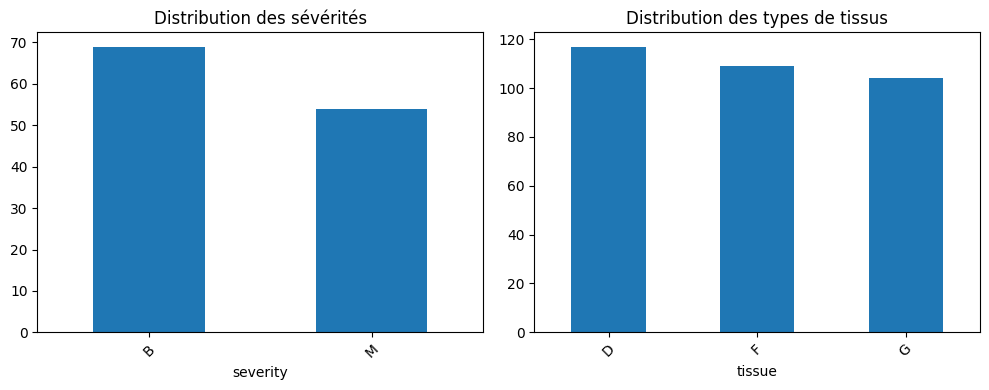

Validation des images...


100%|██████████| 330/330 [00:02<00:00, 110.52it/s]


Images valides : 330 / 330
Distribution finale - Normal: 0, Anormal: 330
Chargement des images...


100%|██████████| 330/330 [00:13<00:00, 24.25it/s]


Images chargées avec succès : 330
Taille de l'ensemble d'entraînement : 264
Taille de l'ensemble de validation : 66
Distribution train - Normal: 0, Anormal: 264
Distribution val - Normal: 0, Anormal: 66


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 384, 384, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1792)           │         7,168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       918,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,733,664 (71.46 MB)

 Trainable params: 5,887,221 (22.46 MB)

 Non-trainable params: 12,846,443 (49.01 MB)

Poids des classes : {0: np.float64(1.0)}

Début de l'entraînement...
Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5186 - auc: 0.0000e+00 - loss: 0.9402 - precision: 1.0000 - recall: 0.5186   
Epoch 1: val_auc improved from -inf to 0.00000, saving model to best_mammo_classifier.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.5190 - auc: 0.0000e+00 - loss: 0.9394 - precision: 1.0000 - recall: 0.5190 - val_accuracy: 0.7879 - val_auc: 0.0000e+00 - val_loss: 0.6703 - val_precision: 1.0000 - val_recall: 0.7879 - learning_rate: 1.0000e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5009 - auc: 0.0000e+00 - loss: 0.9054 - precision: 1.0000 - recall: 0.5009
Epoch 2: val_auc did not improve from 0.00000
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 181ms/step - accuracy: 0.5019 - auc: 0.0000e+00 - loss: 0.9044 - precision: 1.0000 - recall: 0.5019 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.5067 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5416 - auc: 0.0000e+00 - loss: 0.9017 - precision: 1.0000 - recall: 0.5416
Epoch 3: val_auc did not improve from 0.00000
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.5420 - auc: 0.0000e+00 - loss: 0.90

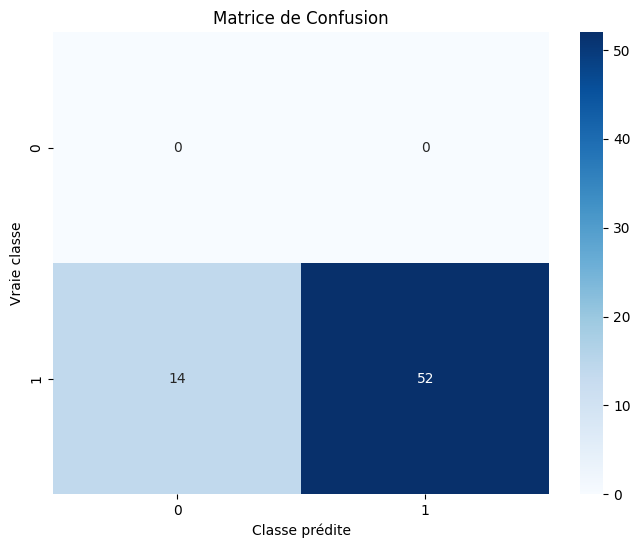

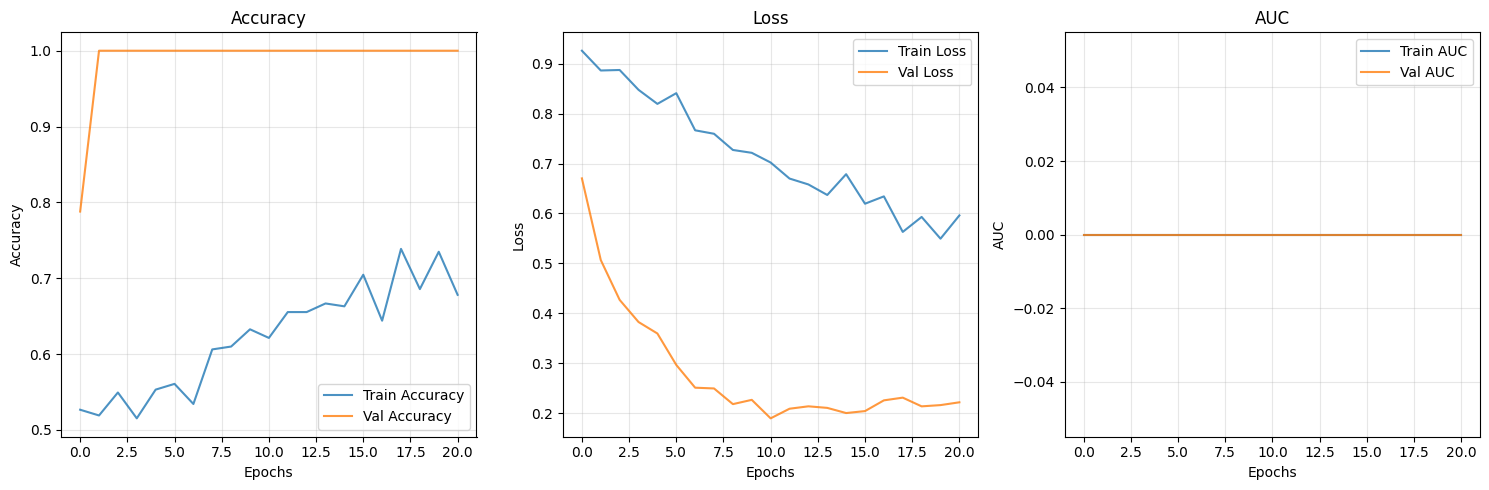


Statistiques finales:
Accuracy: 0.7879
Nombre de vrais positifs: 52
Nombre de vrais négatifs: 0
Nombre de faux positifs: 0
Nombre de faux négatifs: 14
Saved artifact at '/tmp/tmpt2npobq8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 384, 384, 3), dtype=tf.float32, name='keras_tensor_962')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137651746275792: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  137651746277712: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  137647272980944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272978448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272979600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272978832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272981520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272977872: TensorSpec(shape=(), dtype=tf.res

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import os
from google.colab import drive
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------
# 1. Configuration et montage de Google Drive
# ---------------------------------------------------

# Monter Google Drive
drive.mount('/content/drive')

# Configuration des chemins
dataset_path = '/content/drive/MyDrive/MIAS_Mammography'
info_file_path = os.path.join(dataset_path, 'Info.txt')
images_path = os.path.join(dataset_path, 'all-mias')

# Vérification des chemins
if not os.path.exists(info_file_path):
    raise FileNotFoundError(f"Le fichier Info.txt n'a pas été trouvé : {info_file_path}")
if not os.path.exists(images_path):
    raise FileNotFoundError(f"Le dossier d'images n'a pas été trouvé : {images_path}")

print(f"Dataset trouvé : {dataset_path}")
print(f"Nombre d'images disponibles : {len(os.listdir(images_path))}")

# ---------------------------------------------------
# 2. Préparation et analyse des données
# ---------------------------------------------------

# Charger les annotations
annotations = pd.read_csv(info_file_path, sep='\s+', header=0)
annotations.columns = ['ref', 'tissue', 'abnormality', 'severity', 'x', 'y', 'radius']

# Nettoyage et création des labels
annotations['target'] = np.where(annotations['severity'] == 'NORM', 0, 1)
annotations['malignant'] = np.where(annotations['severity'] == 'M', 1, 0)

# Analyse exploratoire
print("Distribution des classes :")
print(annotations['severity'].value_counts())
print(f"\nNombre total d'échantillons : {len(annotations)}")
print(f"Classe positive (anormal) : {annotations['target'].sum()}")
print(f"Classe négative (normal) : {(annotations['target'] == 0).sum()}")

# Visualisation de la distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
annotations['severity'].value_counts().plot(kind='bar')
plt.title('Distribution des sévérités')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
annotations['tissue'].value_counts().plot(kind='bar')
plt.title('Distribution des types de tissus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 3. Validation et préparation des données
# ---------------------------------------------------

def validate_and_prepare_data():
    """Valide et prépare les données en vérifiant l'existence des images"""
    valid_data = []

    print("Validation des images...")
    for _, row in tqdm(annotations.iterrows(), total=len(annotations)):
        ref = row['ref']
        img_path = os.path.join(images_path, f'{ref}.pgm')

        if os.path.exists(img_path):
            try:
                # Test de chargement rapide
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
                    valid_data.append({
                        'ref': ref,
                        'target': row['target'],
                        'severity': row['severity'],
                        'tissue': row['tissue']
                    })
            except:
                print(f"Erreur avec l'image {ref}")
                continue

    valid_df = pd.DataFrame(valid_data)
    print(f"Images valides : {len(valid_df)} / {len(annotations)}")
    print(f"Distribution finale - Normal: {(valid_df['target'] == 0).sum()}, Anormal: {(valid_df['target'] == 1).sum()}")

    return valid_df

# Validation des données
valid_annotations = validate_and_prepare_data()

# ---------------------------------------------------
# 4. Prétraitement des images
# ---------------------------------------------------

def get_augmentation_pipeline(is_training=True):
    if is_training:
        return A.Compose([
            A.Rotate(limit=15, p=0.7),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
            A.GaussNoise(var_limit=(0, 0.02), p=0.3),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
            A.CLAHE(clip_limit=2.0, p=0.5),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

def load_and_preprocess(ref, target_size=(384, 384), augmentation=None):
    """Chargement et prétraitement robuste des images"""
    try:
        img_path = os.path.join(images_path, f'{ref}.pgm')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            raise ValueError(f"Impossible de charger l'image {ref}")

        # Prétraitement
        img = cv2.equalizeHist(img)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_LANCZOS4)

        # Application des augmentations
        if augmentation:
            augmented = augmentation(image=img)
            img = augmented['image']

        return img.astype(np.float32)

    except Exception as e:
        raise ValueError(f"Erreur avec l'image {ref}: {e}")

# ---------------------------------------------------
# 5. Chargement complet des données en mémoire (version corrigée)
# ---------------------------------------------------

def load_all_data(df, target_size=(384, 384), augment_training=False):
    """Charge toutes les données en mémoire avec gestion d'erreurs"""
    X = []
    y = []
    valid_refs = []

    augmentation = get_augmentation_pipeline(augment_training) if augment_training else get_augmentation_pipeline(False)

    print("Chargement des images...")
    for _, row in tqdm(df.iterrows(), total=len(df)):
        try:
            img = load_and_preprocess(row['ref'], target_size, augmentation)
            X.append(img)
            y.append(row['target'])
            valid_refs.append(row['ref'])
        except Exception as e:
            print(f"Échec du chargement de {row['ref']}: {e}")
            continue

    print(f"Images chargées avec succès : {len(X)}")
    return np.array(X), np.array(y), valid_refs

# Chargement des données d'entraînement avec augmentation
X_train_full, y_train_full, train_refs = load_all_data(valid_annotations, augment_training=True)

# ---------------------------------------------------
# 6. Architecture du modèle
# ---------------------------------------------------

def build_advanced_model(input_shape=(384, 384, 3)):
    """Modèle avec architecture optimisée"""
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Dégel progressif des couches
    for layer in base_model.layers[:-30]:
        layer.trainable = False

    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=True)

    # Tête de classification
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy',
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    return model

# ---------------------------------------------------
# 7. Entraînement avec split stratifié
# ---------------------------------------------------

# Split stratifié des données
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=42
)

print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de validation : {len(X_val)}")
print(f"Distribution train - Normal: {(y_train == 0).sum()}, Anormal: {(y_train == 1).sum()}")
print(f"Distribution val - Normal: {(y_val == 0).sum()}, Anormal: {(y_val == 1).sum()}")

# Construction du modèle
model = build_advanced_model()
model.summary()

# Poids des classes pour gérer le déséquilibre
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(f"Poids des classes : {class_weights}")

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_auc',
        patience=20,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ModelCheckpoint(
        'best_mammo_classifier.h5',
        monitor='val_auc',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    )
]

# Entraînement
print("\nDébut de l'entraînement...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# ---------------------------------------------------
# 8. Évaluation complète
# ---------------------------------------------------

# Chargement du meilleur modèle
model.load_weights('best_mammo_classifier.h5')

# Prédictions
print("\nÉvaluation du modèle...")
y_pred_proba = model.predict(X_val, batch_size=16)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Vérification des tailles
print(f"Taille y_val: {len(y_val)}")
print(f"Taille y_pred: {len(y_pred)}")
print(f"Taille y_pred_proba: {len(y_pred_proba)}")

# Métriques
try:
    auc_score = roc_auc_score(y_val, y_pred_proba)
    print(f"\nAUC Score: {auc_score:.4f}")
except:
    print("Erreur dans le calcul de l'AUC")
    auc_score = 0.0

print("\nClassification Report:")
try:
    print(classification_report(y_val, y_pred))
except Exception as e:
    print(f"Erreur dans le rapport de classification: {e}")

# Matrice de confusion
plt.figure(figsize=(8, 6))
try:
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()
except Exception as e:
    print(f"Erreur dans la matrice de confusion: {e}")

# Courbes d'apprentissage
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', alpha=0.8)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', alpha=0.8)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss', alpha=0.8)
plt.plot(history.history['val_loss'], label='Val Loss', alpha=0.8)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUC', alpha=0.8)
plt.plot(history.history['val_auc'], label='Val AUC', alpha=0.8)
plt.title('AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques détaillées
print(f"\nStatistiques finales:")
print(f"Accuracy: {(y_pred == y_val).mean():.4f}")
print(f"Nombre de vrais positifs: {((y_pred == 1) & (y_val == 1)).sum()}")
print(f"Nombre de vrais négatifs: {((y_pred == 0) & (y_val == 0)).sum()}")
print(f"Nombre de faux positifs: {((y_pred == 1) & (y_val == 0)).sum()}")
print(f"Nombre de faux négatifs: {((y_pred == 0) & (y_val == 1)).sum()}")

# ---------------------------------------------------
# 9. Sauvegarde finale
# ---------------------------------------------------

# Sauvegarde du modèle
model.save('/content/drive/MyDrive/mammo_classifier_final.h5')

# Conversion TFLite
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()

    with open('/content/drive/MyDrive/mammo_classifier.tflite', 'wb') as f:
        f.write(tflite_model)

    print(f"\nModèle sauvegardé avec succès !")
    print(f"Taille du modèle TFLite: {len(tflite_model) / 1024 / 1024:.2f} MB")
except Exception as e:
    print(f"Erreur lors de la conversion TFLite: {e}")

# Sauvegarde des métadonnées
import json
metadata = {
    'model_performance': {
        'auc_score': float(auc_score),
        'total_samples': len(valid_annotations),
        'train_samples': len(X_train),
        'val_samples': len(X_val),
        'class_distribution': {
            'normal': int((y_train_full == 0).sum()),
            'abnormal': int((y_train_full == 1).sum())
        }
    },
    'model_config': {
        'input_shape': [384, 384, 3],
        'architecture': 'EfficientNetB4',
        'epochs_trained': len(history.history['loss'])
    }
}

with open('/content/drive/MyDrive/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Métadonnées sauvegardées !")

In [ ]:
from google.colab import files
import hashlib

def check_file_in_drive(file_path):
    """Vérifie qu'un fichier existe et affiche sa taille"""
    if os.path.exists(file_path):
        size = os.path.getsize(file_path) / (1024*1024)
        print(f"✅ Fichier trouvé : {file_path} ({size:.2f} MB)")

        # Vérification de l'intégrité (optionnel)
        with open(file_path, 'rb') as f:
            md5 = hashlib.md5(f.read()).hexdigest()
        print(f"   MD5 Checksum : {md5}")
    else:
        print(f"❌ Fichier manquant : {file_path}")

# Vérification des sauvegardes
check_file_in_drive('/content/drive/MyDrive/mammo_classifier_final.h5')
check_file_in_drive('/content/drive/MyDrive/mammo_classifier.tflite')
check_file_in_drive('/content/drive/MyDrive/model_metadata.json')

✅ Fichier trouvé : /content/drive/MyDrive/mammo_classifier_final.h5 (117.30 MB)
   MD5 Checksum : e0f5c3e0b83277eb554cf028325949dc
✅ Fichier trouvé : /content/drive/MyDrive/mammo_classifier.tflite (19.18 MB)
   MD5 Checksum : 91268abdcdd76456dc818ee0dd79478f
✅ Fichier trouvé : /content/drive/MyDrive/model_metadata.json (0.00 MB)
   MD5 Checksum : f9e42d885972e1d9524fc4fc9470ba4a


In [ ]:
# Création d'un dossier daté
from datetime import datetime
model_folder = f"/content/drive/MyDrive/Mammo_Models/{datetime.now().strftime('%Y%m%d_%H%M')}"
os.makedirs(model_folder, exist_ok=True)

# Nouveaux chemins de sauvegarde
h5_path = f"{model_folder}/mammo_classifier.h5"
tflite_path = f"{model_folder}/mammo_classifier.tflite"
metadata_path = f"{model_folder}/metadata.json"

# Sauvegarde avec les nouveaux chemins
model.save(h5_path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"\nModèle et métadonnées sauvegardés dans : {model_folder}")

Saved artifact at '/tmp/tmp7uaqqq53'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 384, 384, 3), dtype=tf.float32, name='keras_tensor_962')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137651746275792: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  137651746277712: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  137647272980944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272978448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272979600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272978832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272981520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272977872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272977488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137647272976144: TensorSpec(shape=(), dtype=tf.resource, name=

# **Exemple d'utilisation de ce modèle**

**1. Chargement du Modèle Sauvegardé**

In [ ]:
from google.colab import drive
import tensorflow as tf
import cv2
import numpy as np
from google.colab import files
from IPython.display import display, Image
import matplotlib.pyplot as plt

# Monter Google Drive
#drive.mount('/content/drive')

# Charger le modèle
model_path = '/content/drive/MyDrive/Mammo_Models/20250803_0118/mammo_classifier.h5'
model = tf.keras.models.load_model(model_path)
print("Modèle chargé avec succès !")

Modèle chargé avec succès !


**2. Fonction de Prétraitement**

In [ ]:
def preprocess_external_image(image_path, target_size=(384, 384)):
    """Charge et prétraite une image externe"""
    # Chargement en niveaux de gris
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError("Impossible de charger l'image. Vérifiez le chemin.")

    # Prétraitement identique à l'entraînement
    img = cv2.equalizeHist(img)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Conversion en RGB
    img = cv2.resize(img, target_size, interpolation=cv2.INTER_LANCZOS4)
    img = img.astype(np.float32) / 255.0  # Normalisation

    # Normalisation avec les mêmes paramètres que l'entraînement
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = (img - mean) / std

    return np.expand_dims(img, axis=0)  # Ajout d'une dimension batch

**3. Importation et Prédiction sur une Image Externe**

Saving Capture d’écran du 2025-08-03 02-27-15.png to Capture d’écran du 2025-08-03 02-27-15 (1).png

Image originale :


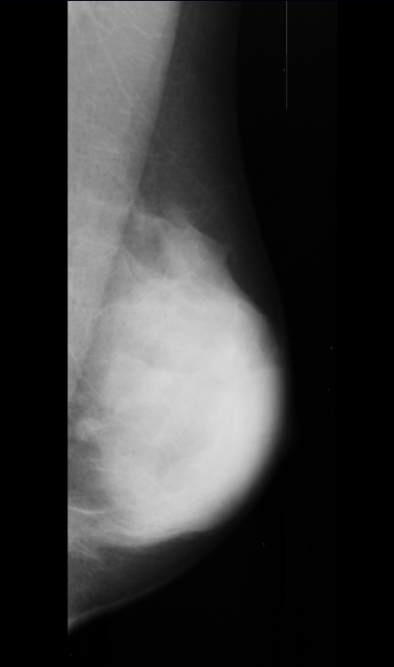

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

🔍 Résultats :


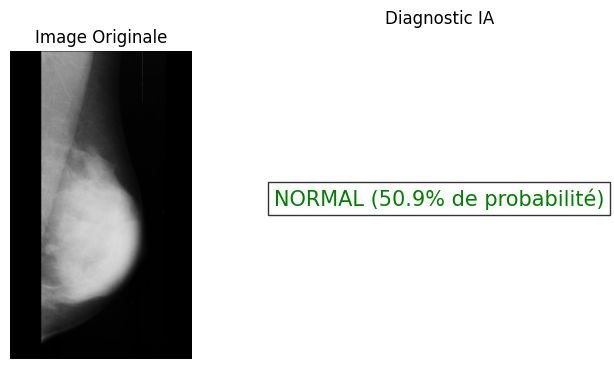


Détails techniques :
- Probabilité d'anomalie : 49.15%
- Classe prédite : Normal
- Seuil de décision : 50%


In [ ]:
# Téléverser une image depuis votre ordinateur
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Afficher l'image originale
print("\nImage originale :")
display(Image(image_name, width=300))

# Prétraitement et prédiction
try:
    # Prétraitement
    input_image = preprocess_external_image(image_name)

    # Prédiction
    prediction = model.predict(input_image)
    proba_anormal = prediction[0][0] * 100  # Conversion en pourcentage

    # Interprétation
    if proba_anormal > 50:
        result = f"ANORMAL ({proba_anormal:.1f}% de probabilité)"
        color = 'red'
    else:
        result = f"NORMAL ({100 - proba_anormal:.1f}% de probabilité)"
        color = 'green'

    # Affichage des résultats
    print("\n🔍 Résultats :")
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB))
    plt.title("Image Originale")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, result,
             fontsize=15, ha='center', color=color,
             bbox=dict(facecolor='white', alpha=0.8))
    plt.axis('off')
    plt.title("Diagnostic IA", pad=20)
    plt.show()

    # Détails techniques
    print(f"\nDétails techniques :")
    print(f"- Probabilité d'anomalie : {proba_anormal:.2f}%")
    print(f"- Classe prédite : {'Anormal' if proba_anormal > 50 else 'Normal'}")
    print(f"- Seuil de décision : 50%")

except Exception as e:
    print(f"\n❌ Erreur lors de l'analyse : {e}")